# Kidney Disease Detection

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
from sklearn.model_selection import cross_validate
%matplotlib inline

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [9]:
numerical_features = []
categorical_features = []

for i in df.columns:
  if df[i].nunique()>7:
    numerical_features.append(i)
  else:
    categorical_features.append(i)

In [10]:
for i in categorical_features:
  print(f'{i} has {df[i].unique()} categories. \n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories. 

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories. 

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories. 

red_blood_cells has [nan 'normal' 'abnormal'] categories. 

pus_cell has ['normal' 'abnormal' nan] categories. 

pus_cell_clumps has ['notpresent' 'present' nan] categories. 

bacteria has ['notpresent' 'present' nan] categories. 

hypertension has ['yes' 'no' nan] categories. 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories. 

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories. 

appetite has ['good' 'poor' nan] categories. 

pedal_edema has ['no' 'yes' nan] categories. 

anemia has ['no' 'yes' nan] categories. 

classification has ['ckd' 'ckd\t' 'notckd'] categories. 



In [8]:
cols_names={"bp":"blood_pressure", "sg":"specific_gravity", "al":"albumin", "su":"sugar", "rbc":"red_blood_cells", "pc":"pus_cell", "pcc":"pus_cell_clumps", "ba":"bacteria", "bgr":"blood_glucose_random", "bu":"blood_urea", "sc":"serum_creatinine", "sod":"sodium", "pot":"potassium", "hemo":"haemoglobin", "pcv":"packed_cell_volume", "wc":"white_blood_cell_count", "rc":"red_blood_cell_count", "htn":"hypertension", "dm":"diabetes_mellitus", "cad":"coronary_artery_disease", "appet":"appetite", "pe":"pedal_edema", "ane":"anemia"}
df.rename(columns=cols_names, inplace=True)

In [ ]:
#df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'}) 
#df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no') 
#df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

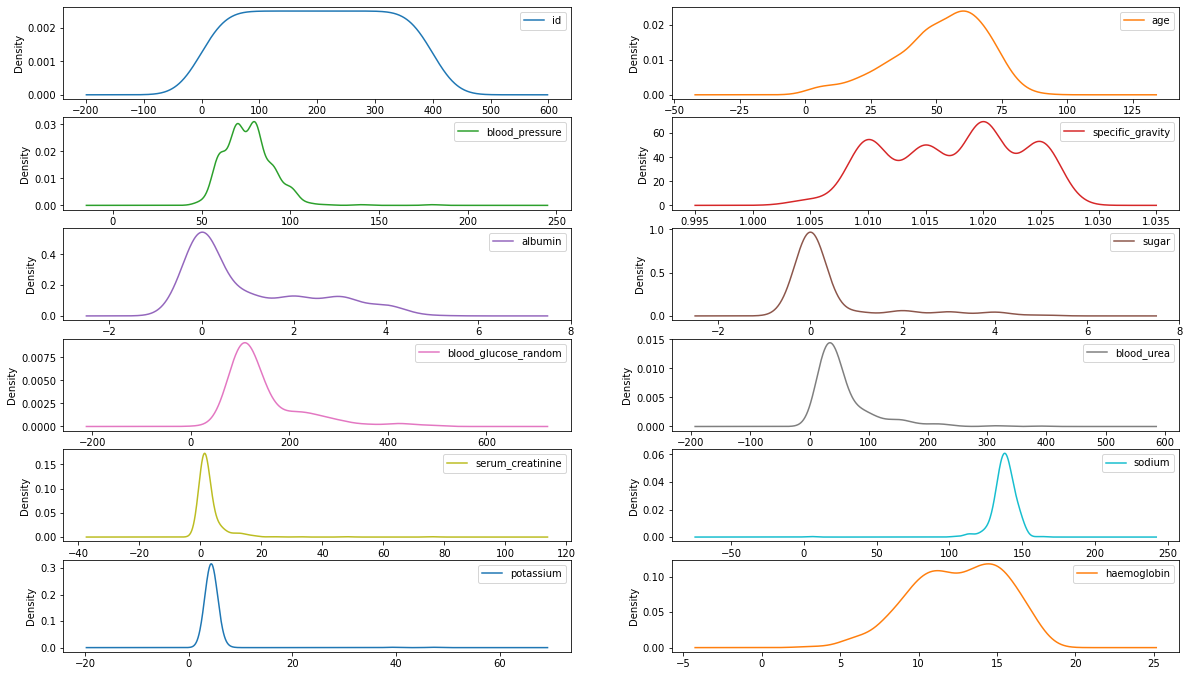

In [11]:
# Distribution of numerical features
df.plot(sharex=False,layout = (10,2), subplots = True,figsize = (20,20),kind = 'density')
plt.show()

C:\Users\nehak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nehak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nehak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nehak\anaconda3\lib\si

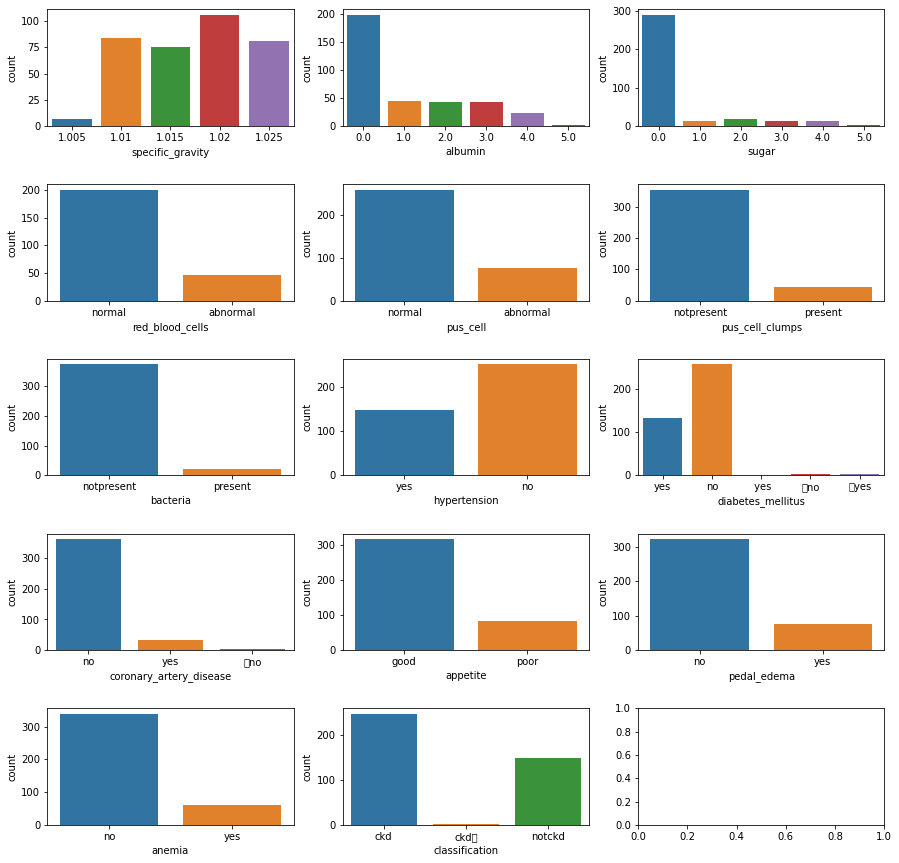

In [12]:
# Distribution of categorical features
fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

for ax,feats in zip(axes.flatten(), categorical_features):
     sns.countplot(df[feats],ax=ax)


### Data Cleaning

In [13]:
df[['diabetes_mellitus']] = df[['diabetes_mellitus']].replace(to_replace={'yes':1,'no':0})
df[['red_blood_cells','pus_cell']] = df[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
df[['pus_cell_clumps']] = df[['pus_cell_clumps']].replace(to_replace={'present':1,'notpresent':0})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [14]:
# Further cleaning
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df["packed_cell_volume"]=df["packed_cell_volume"].fillna(method="ffill")
df["red_blood_cells"]=df["red_blood_cells"].fillna(method="ffill")
df.dropna(inplace=True,subset='red_blood_cells')
df=df.fillna(method="ffill")

In [15]:
df=df.drop(["white_blood_cell_count","potassium","sodium"],axis=1)
df.drop('id',axis=1,inplace=True)
df.drop(["age"],axis=1,inplace=True)
df.drop(["bacteria"],axis=1,inplace=True)
df.drop(["pedal_edema"],axis=1,inplace=True)
df.drop(["coronary_artery_disease"],axis=1,inplace=True)
df.drop(["anemia"],axis=1,inplace=True)
df.drop(["blood_urea"],axis=1,inplace=True)
df.drop(["serum_creatinine"],axis=1,inplace=True)
df.drop(["haemoglobin"],axis=1,inplace=True)
df.drop(["appetite"],axis=1,inplace=True)
df.drop(["hypertension"],axis=1,inplace=True)
df.drop(["packed_cell_volume"],axis=1,inplace=True)
df.drop(["red_blood_cell_count"],axis=1,inplace=True)
df.drop(["blood_glucose_random"],axis=1,inplace=True)

1.0    248
0.0    150
Name: class, dtype: int64

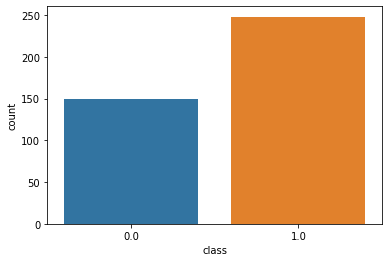

In [16]:
sns.countplot(x='class',data=df)
df['class'].value_counts()

In [17]:
df=df.replace("\t?",31)
print(df.columns)
print(df.shape[1])

Index(['blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'diabetes_mellitus',
       'class'],
      dtype='object')
9


In [18]:
target=df["class"]

In [19]:
source=df.drop(["class"],axis=1)

In [20]:
df.isnull().sum()

blood_pressure       0
specific_gravity     0
albumin              0
sugar                0
red_blood_cells      0
pus_cell             0
pus_cell_clumps      0
diabetes_mellitus    0
class                0
dtype: int64

In [21]:
numerical_features = []
categorical_features = []

for i in df.columns:
  if df[i].nunique()>7:
    numerical_features.append(i)
  else:
    categorical_features.append(i)

In [22]:
for i in categorical_features:
  print(f'{i} has {df[i].unique()} categories. \n')

specific_gravity has [1.01  1.005 1.015 1.02  1.025] categories. 

albumin has [2. 4. 3. 0. 1. 5.] categories. 

sugar has [3. 0. 4. 1. 2. 5.] categories. 

red_blood_cells has [0. 1.] categories. 

pus_cell has [0. 1.] categories. 

pus_cell_clumps has [0. 1.] categories. 

diabetes_mellitus has [1. 0.] categories. 

class has [1. 0.] categories. 



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

In [24]:
X_train,X_test,y_train,y_test=train_test_split(source,target,test_size=0.05)

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

100.0

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model1 = LogisticRegression()

In [31]:
model1.fit(X_train,y_train)

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred1)
accuracy*100

100.0

In [33]:
joblib.dump(model1,r"kidney_disease_model.pkl")

['kidney_disease_model.pkl']